In [1]:
import matplotlib.pyplot as plt

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

En esta sesión veremos algunas operaciones y algoritmos que se pueden hacer en un árbol binario de búsqueda (BST por sus siglas en inglés), por ejemplo buscar e insertar elementos, así como construir un BST a partir de una lista de números dada.

Para trabajar con un BST, lo primero que debemos hacer es definir la estructura de nuestros nodos en el árbol, donde cada nodo tiene un valor asignado, y dos apuntadores, uno para su hijo izquierdo y otro para su hijo derecho.

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"

In [3]:
n = Node(4)
n.left = Node(3)
n.right = Node(5)
print(n)

Valor: 4
Izquierda: 3
Derecha: 5


# Inserción y búsqueda

Veamos las primeras dos operaciones básicas en un BST: buscar elementos, e insertar elementos. Para insertar elementos en un BST, procedemos de una forma muy similar a como se hace una búsqueda binaria: si queremos insertar el valor `x` y estamos en el nodo `n`, comparamos `n.value` con `x`, para lo cual existen tres casos posibles:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, lo volvemos `x`.
* `x > n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, lo volvemos `x`.
* `x = n.value`: No hacemos nada, ya que no puede haber elementos duplicados en el BST.

In [4]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
    
    def insert(self, x):
        if self.val == x:
            return

        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        else:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)

In [5]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)
root.left.insert(5)
print(root.right)

Valor: 1
Izquierda: None
Derecha: 2


Para buscar un elemento, el procedimiento es prácticamente el mismo que en la inserción:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, significa que `x` no está en el árbol.
* `x > n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, significa que `x` no está en el árbol.
* `x = n.value`: `n` es el nodo que buscamos, así que lo regresamos.

In [6]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
       
    
    def insert(self, x):
        if x == self.val:
            return
        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        elif x > self.val:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)
                
                
    def search(self, x):
        if self.val == x:
            return self
        
        elif x < self.val:
            if self.left is None:
                return
            else:
                return self.left.search(x)
            
        elif x > self.val:
            if self.right is None:
                return
            else:
                return self.right.search(x)

In [7]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)

root.search(2)

Valor: 2
Izquierda: None
Derecha: None

# Recorridos

Veremos ahora tres de las formas más comunes de recorrer un BST: in-order y pre-order traversal. Usaremos el siguiente árbol:

```
          4
        /    \
       2      6
      / \    / \
     1   3  5   7
    /            \
   0              8
```   

In [8]:
tree = Node(4)
tree.insert(2)
tree.insert(1)
tree.insert(0)
tree.insert(3)
tree.insert(6)
tree.insert(5)
tree.insert(7)
tree.insert(8)

## In-order

In-order traversal nos permite rescatar la lista de números de manera ordenada, visita primero todo lo que hay a la izquierda de la raíz, después la raíz y posteriormente el hijo derecho, haciendo esto de manera recursiva. Esto nos será muy útil para después poder eliminar elementos en un árbol binario de búsqueda. Veamos un ejemplo de un in-order traversal en un árbol de este tipo.

In [9]:
def in_order(root):
    if root is not None:
        in_order(root.left)
        print(root.val) # aquí es donde visitamos
        in_order(root.right)
    else:
        return

in_order(tree)

0
1
2
3
4
5
6
7
8


Notemos que con este tipo de ideas podemos encontrar el mínimo valor y el máximo valor en un árbol binario de búsqueda.

## Pre-order

Consiste en visitar el nodo actual, después lo que hay en su hijo izquierdo y después en su hijo derecho. Podemos notar que es un recorrido particular de un recorrido de DFS en un árbol.

In [10]:
def pre_order(root):
    if root is not None:
        print(root.val)
        pre_order(root.left)
        pre_order(root.right)
    else:
        return

pre_order(tree)

4
2
1
0
3
6
5
7
8


## Post-order

Consiste en visitar el subárbol izquierdo, luego el derecho, y finalmente el nodo actual. 

In [11]:
def post_order(root):
    if root is not None:
        post_order(root.left)
        post_order(root.right)
        print(root.val)
    else:
        return

post_order(tree)

0
1
3
2
5
8
7
6
4


# Graficado

Nótese que podemos utilizar cualquiera de las caminatas anteriores para construir una gráfica de `networkx` a partir de nuestro árbol: cada vez que visitamos un nodo, lo añadimos a él y a sus hijos a la gráfica, junto con las aristas que los unen:

In [12]:
def build_graph(root, g=None):
    if g is None:
        g = nx.Graph()
    
    if root is not None:
        build_graph(root.left, g)
        g.add_node(root.val)
        if root.left is not None:
            g.add_edge(root.val, root.left.val)
        if root.right is not None:
            g.add_edge(root.val, root.right.val)
        build_graph(root.right, g)
    return g

Para asegurarnos que al momento de graficar se vea como un árbol, usamos el layout `dot` de `graphviz`:

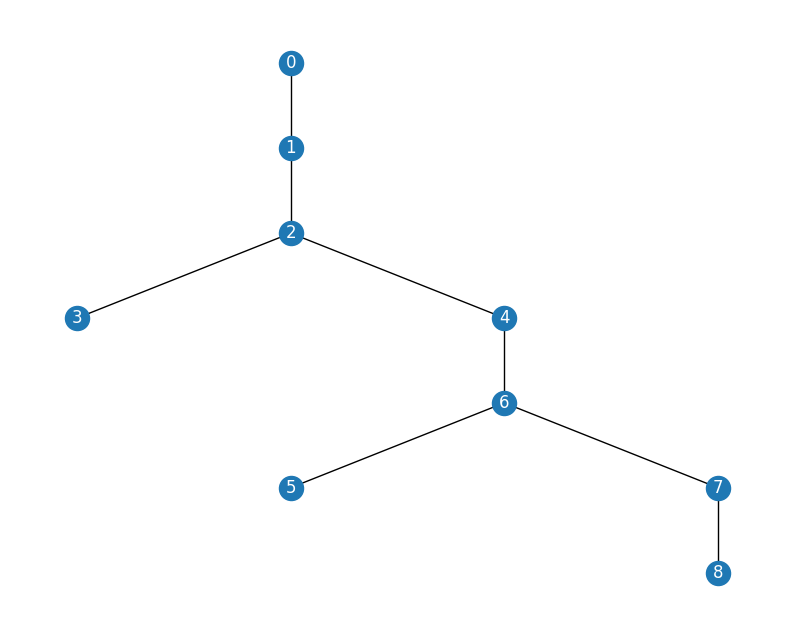

In [13]:
g = build_graph(tree)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos, font_color="white")

# Borrado

Veamos ahora cómo eliminar un nodo $N$ de un BST. Notemos que hay tres casos posibles:


*   Si $N$ no tiene hijos, es suficiente con eliminar dicho nodo.
*   Si $N$ tiene únicamente un hijo, reemplazamos el nodo $N$ por su hijo.
*   Si $N$ tiene dos hijos, tenemos que reacomodar de una manera más sofisticada los nodos para que siga siendo un BST. Esto podemos hacerlo con el siguiente algoritmo:

    1. Encontramos el siguiente nodo con un valor mayor a $N$, i.e., su sucesor en in-order traversal; llámese $S$. Nótese que este nodo es el que tiene menor valor del subárbol derecho.  
    2. Reemplazamos el valor de $N$ con el de $S$.
    3. Borramos $S$, esto último se puede hacer sin problemas pues el sucesor de un nodo con dos hijos es necesariamente una hoja, ya que es el valor mínimo en el subárbol con raíz en su hijo derecho.

Para hacer esto, necesitaremos una función que nos permita encontrar el valor mínimo en un sub árbol a partir de cierto nodo. 

In [14]:
def min_value(root):
    if root is not None:
        while root.left is not None:
            root = root.left
        return root
    else:
        return None

Ahora, implementamos el algoritmo de borrado de modo que si pedimos eliminar un valor que no existe, el BST no se vea modificado y no haya problemas.

In [15]:
def delete(root, x):
    if root is not None:
        if root.val == x:
            if root.left is None: # Tiene a lo más un hijo, el derecho
                new = root.right
                root = None # Vaciamos el nodo root
                return new
            elif root.right is None: # Tiene sólo el hijo izquierdo
                new = root.left
                root = None
                return new
            else: # Tiene ambos hijos
                new = min_value(root.right)
                root.val = new.val
                root.right = delete(root.right, new.val)
                return root
        else: 
            if root.val < x:
                root.right = delete(root.right, x)
            else:
                root.left = delete(root.left, x)
            return root
    else:
        return None


# rd = Node(L[0])
# for l in L[1:]:
#     rd.insert(l)

delete(tree, 4)
in_order(tree)

0
1
2
3
5
6
7
8


# Reconstrucción

Veamos un último ejemplo. Supongamos que se tiene una lista no vacía de enteros distintos $L$, tal que $L$ es el pre-order de un árbol binario de búsqueda, nuestro objetivo es reconstruir dicho BST.

Una primer idea para atacar este problema sería hacer lo que ya hicimos previamente, ir agregando elemento por elemento usando nuestra función de insertar, sin ambargo, hacer esto nos puede tomar $O(n^2)$ en tiempo (si nuestro árbol resulta ser un camino). 

Optimizaremos nuestro algoritmo usando una pila. Comenzamos con una pila $P$ a la que agregamos el primer valor de la lista $L$, el cual también lo haremos la raíz de nuestro BST. Posteriormente vamos a iterar sobre los elementos de $L$, y tenemos dos casos:

*   Si el elemento actual es menor que el elemento en la cima de la pila, hacemos que este elemento sea hijo izquierdo de la cima, y agregamos el nodo a la pila.
*   Si el elemento actual es mayor que el elemento en la cima de la pila, removemos dicha cima de la pila, y continuamos removiendo elementos hasta llegar a que la pila sea vacía o que el elemento en la cima sea mayor que el actual, y hacemos que el elemento actual sea el hijo derecho del último elemento que se removió de la pila. Posteriormente agregamos el nodo con valor el elemento actual a la pila.

Veamos una implementación de este algoritmo.



In [16]:
from collections import deque

def construct_BST(L):
    root = Node(L[0])
    queue = deque()
    queue.append(root)
    for i in range (1, len(L)):
        if L[i] < queue[-1].val:
            curr = Node(L[i])
            queue[-1].left = curr
            queue.append(curr)
        else:
            curr = Node(L[i])
            last = queue[-1]
            while queue:
                if(L[i] < queue[-1].val):
                    break
                else:
                    last = queue[-1]
                    queue.pop()
            last.right = curr
            queue.append(curr)
    return root

BST_from_L = construct_BST([2, 1, 7, 4, 3, 6, 5, 8])
print("In order:")
in_order(BST_from_L)
print('Pre order:')
pre_order(BST_from_L)

In order:
1
2
3
4
5
6
7
8
Pre order:
2
1
7
4
3
6
5
8


# Ejercicios

## Ejercicio 1

Tenemos un BST con las siguientes reglas:

* `root.val = 0`
* Si `node.left != None` (donde `node` es un nodo arbitrario, incluyendo la raíz), y `node.val = x`, entonces `node.left.val = 2*x + 1`.
* Si `node.right != None`, y `node.val = x`, entonces `node.right.val = 2*x + 2`.

Asumiendo que tienes un árbol que sigue estas reglas (definido usando la clase `Node` previamente vista), y que no sabes el valor de ninguno de sus nodos, escribe una función que actualice el valor de todos los nodos.

Pruébalo con el siguiente árbol:

```
    -1
   /  \
  -1  -1
 /  \
-1  -1
```

In [17]:
root = Node(-1)
root.left = Node(-1)
root.left.left = Node(-1)
root.left.right = Node(-1)
root.right = Node(-1)

Tu función debe de actualizar los valores a:

```
     0
   /  \
  1    2
 /  \
3    4
```

**Explicación:**

`enumerate_tree_nodes`: 

Esta es la función principal, la cual se invoca explícitamente.Su función es inicializar el valor del nodo raíz a 0 y luego llamar a `update_nodes` para propagar los valores a todos los nodos del árbol.

- Si el árbol no está vacío (root no es None), asigna el valor 0 a la raíz y llama a `update_nodes` para actualizar el resto de los nodos.

- Llama a `update_nodes(root)` para actualizar los valores de los hijos y el resto de los nodos del árbol, siguiendo las reglas ya mencionadas.

- Si el árbol está vacío (root es None), retorna None.


`update_nodes`: Esta función auxiliar recorre el árbol binario y actualizar los valores de cada nodo según su valor actual y el de sus hijos. 

- Si el nodo tiene un hijo izquierdo, se le asigna el valor 2*node.val + 1, y la función llama recursivamente a sí misma para seguir actualizando los valores del subárbol izquierdo.
- Si el nodo tiene un hijo derecho, se le asigna el valor 2*node.val + 2, y de manera recursiva, la función actualiza los nodos del subárbol derecho.
- Esto continúa hasta que todos los nodos hayan sido visitados.

In [18]:
def update_nodes(node):
    """
    Updates the value of each node according to the following rule:
    - If the current node node has value x, then its left child (if it has) has value 2*x + 1
    - Its right child (if it has) has value 2*x + 2.
    """
    if node.left is not None:
        node.left.val = 2*node.val + 1
        update_nodes(node.left)
    if node.right is not None:
        node.right.val = 2*node.val + 2
        update_nodes(node.right)

def enumerate_tree_nodes(root):
    """
    Updates the value of each node in the tree and returns the root node.
    The tree values are an enumeration of the nodes in breadth-first order.
    """
    if root is not None:
        root.val = 0
        update_nodes(root) # Above function
        return root
    else:
        return None

# Testing
enumerated_tree = enumerate_tree_nodes(root)
print('Root:', enumerated_tree.val)
print('Left:', enumerated_tree.left.val)
print('Right:', enumerated_tree.right.val)
print('Left Left:', enumerated_tree.left.left.val)
print('Left Right:', enumerated_tree.left.right.val)

Root: 0
Left: 1
Right: 2
Left Left: 3
Left Right: 4


```
        0       (root.val = 0)
       /  \
     1     2    (left.val = 2*0 + 1, right.val = 2*0 + 2)
    / \
   3   4       (left-left.val = 2*1 + 1, left-right.val = 2*1 + 2)
```

## Ejercicio 2

Escribe una función para verificar si un árbol binario es un BST (i.e., que se cumplen las relaciones de menor que/mayor que para cada sub-árbol).

**Explicación:**

Se creó una función recursiva tal que:

**Caso base**: 

Si el nodo es None hemos llegado al final de un subárbol (una hoja), lo cual es válido, así que retornamos True.

**Rango de valores perimitidos**:

- Cada nodo debe tener un valor que esté entre un min_val y un max_val.
- Para el nodo actual, este valor debe estar entre min_val < node.val < max_val. Si no se cumple esta condición, se retorna False.

**Recursión**: 

- Para el subárbol izquierdo, el valor máximo permitido es el valor del nodo actual (node.val), ya que todos los nodos en el subárbol izquierdo deben ser menores que este valor.
- Para el subárbol derecho, el valor mínimo permitido es el valor del nodo actual, ya que todos los nodos en el subárbol derecho deben ser mayores que este valor.

In [19]:
def is_BST(node, min_val=float('-inf'), max_val=float('inf')):
    """
    Check if the tree is a binary search tree (BST).
    """
    if node is None:
        return True  # We reached a leaf node, thus it is a BST.

    # Check if current node value is within the valid range.
    if not (min_val < node.val < max_val):
        return False

    # Recursively check the left and right subtrees with updated valid ranges.
    return (is_BST(node.left, min_val, node.val) and is_BST(node.right, node.val, max_val))

# Testing
print(is_BST(enumerated_tree)) # Should be FALSE
# El arból enumerado no es un BST porque el nodo 1 tiene un valor mayor que el nodo 0, pero es su hijo izquierdo.
print(is_BST(BST_from_L)) # Should be TRUE
print(is_BST(tree)) # Should be TRUE

False
True
True


Otro caso:
```
      10
     /  \
    5   20
   / \
  1   15
``` 

In [20]:
test_tree = Node(10)
test_tree.left = Node(5)
test_tree.right = Node(20)
test_tree.left.left = Node(1)
test_tree.left.right = Node(15)
print(is_BST(test_tree)) # Should be FALSE

False


## Ejercicio 3

En un BST, los valores de dos nodos se intercambiaron accidentalmente. Escribe una función que encuentre estos dos nodos, y regrese el árbol a su estado original.

Pruébalo con el siguiente árbol:

```
          4
        /    \
       2      6
      / \    / \
     7   3  5   1
    /            \
   0              8
```   

In [21]:
# Adding nodes of the example tree
tree = Node(4)
tree.left = Node(2)
tree.right = Node(6)
tree.left.left = Node(7)
tree.left.right = Node(3)
tree.right.left = Node(5)
tree.right.right = Node(1)
tree.left.left.left = Node(0)
tree.right.right.right = Node(8)
in_order(tree)
print(is_BST(tree)) # Should be FALSE

0
7
2
3
4
5
6
1
8
False


El árbol correcto es:

```
          4
        /    \
       2      6
      / \    / \
     1   3  5   7
    /            \
   0              8
```   

**Explicación:**

`in_order_list`: 

Crea una lista con los valores del árbol recorrido en in-orden.

`swap_nodes`:

Intercambia los valores de los nodos con valores x y y en el árbol.
- La función recibe el nodo raíz y los valores x y y que se quieren intercambiar.
- Si el nodo actual tiene el valor x, su valor se cambia a y, y si tiene el valor y, se cambia a x.
- La función se llama recursivamente para los subárboles izquierdo y derecho, asegurando que todos los nodos sean revisados.

`undo_swap(tree)`:

Restaura el orden original de un árbol binario de búsqueda (BST) si dos nodos han sido intercambiados por error.
- Llama a `in_order_list(tree)` para obtener una lista L de los valores de los nodos en orden in-order. En un árbol BST correctamente ordenado, esta lista debe estar en orden ascendente.
-  La función busca en la lista los dos elementos que no están en orden ascendente.
- Encuentra el primer par de elementos que no respetan el orden, y luego busca el segundo elemento fuera de orden.
- Utiliza swap_nodes(tree, x, y) para intercambiar los dos nodos que están fuera de orden.

In [22]:
def in_order_list(root, L=None):
    """Creates a list with the in-order traversal of the tree"""
    if L is None:
        L = []
    if root is not None:
        in_order_list(root.left, L)
        L.append(root.val)
        in_order_list(root.right, L)
    return L

def swap_nodes(root, x, y):
    """
    Swap the values of the nodes with values x and y in the tree
    """
    if root is not None:
        # If the current node has value x or y, we swap it
        if root.val == x:
            root.val = y
        elif root.val == y:
            root.val = x
        # We continue the search in the left and right subtrees
        swap_nodes(root.left, x, y)
        swap_nodes(root.right, x, y)

def undo_swap(tree):
    """
    Swap back the two elements that are not in order
    in the tree to restore the original tree
    """
    L = in_order_list(tree)
    # We are going to find the two elements that are swapped
    # i.e. the two elements that are not in order
    # print(L)
    unordered = []
    index = 0
    for i in range(len(L)-1):
        if L[i] > L[i+1]:
            unordered.append(L[i])
            index = i+1
            break
    for i in range(index, len(L)-1):
        if L[i] > L[i+1]:
            unordered.append(L[i+1])
            break
    # We swap the values of the two elements
    swap_nodes(tree, unordered[0], unordered[1])

# We are going to swap 7 and 1
print("Original in-order:")
in_order(tree)
undo_swap(tree)
print("Corrected in-order:")
in_order(tree)
is_BST(tree) # Should be TRUE

Original in-order:
0
7
2
3
4
5
6
1
8
Corrected in-order:
0
1
2
3
4
5
6
7
8


True